In [2]:
   import pandas as pd
   file_path = "concrete_data.csv"
   mydata = pd.read_csv(file_path)
   print(type(mydata))

<class 'pandas.core.frame.DataFrame'>


In [3]:
mydata.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
mydata. head(5)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:

mydata.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [6]:
mydata.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [7]:
mydata.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


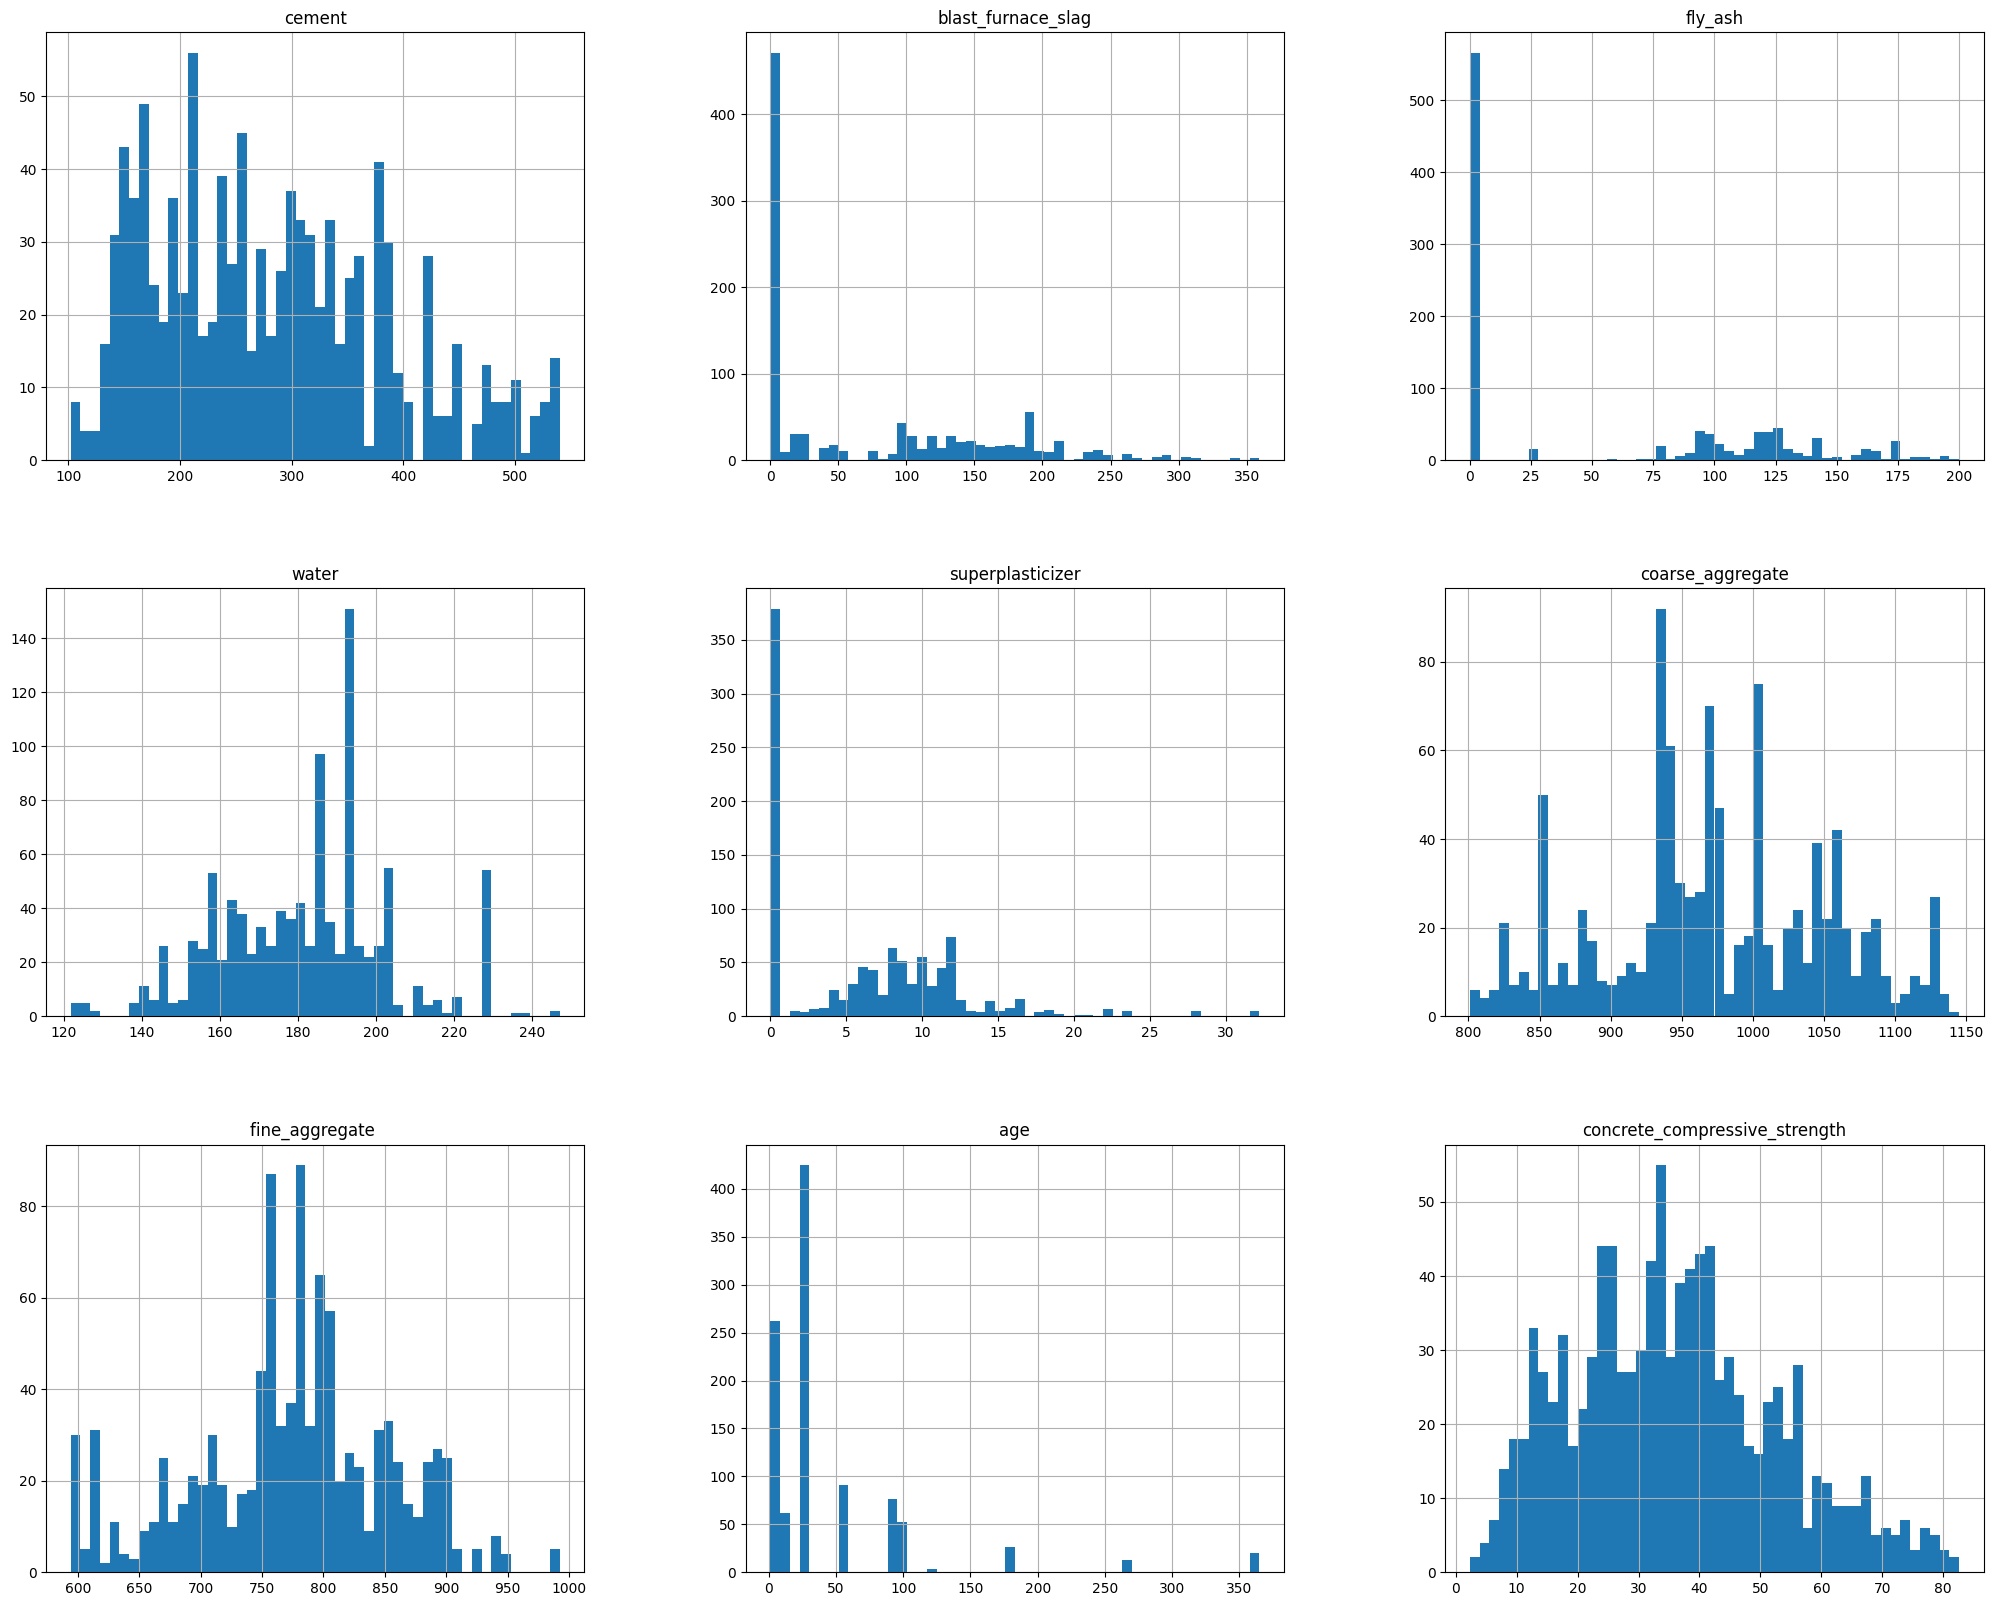

In [8]:
import matplotlib.pyplot as plt
mydata.hist(bins=50, figsize=(25,20))
plt.show()

In [9]:
corr_matrix = mydata.corr()
corr_matrix["concrete_compressive_strength"].sort_values(ascending=False)

concrete_compressive_strength    1.000000
cement                           0.497832
superplasticizer                 0.366079
age                              0.328873
blast_furnace_slag               0.134829
fly_ash                         -0.105755
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
water                           -0.289633
Name: concrete_compressive_strength, dtype: float64

In [14]:
import numpy as np
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(mydata, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [18]:
print(len(train_set))
print(len(test_set))

NameError: name 'train_set' is not defined

In [20]:
mydata["cement_c"] = pd.cut(mydata["cement"],
                          bins=[0., 192.375, 272.9, 350.0, 450.0, np.inf],
                          labels=[1, 2, 3, 4, 5])

<Axes: >

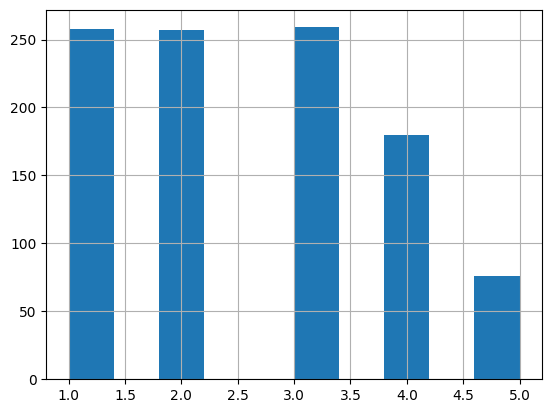

In [21]:

mydata["cement_c"].hist()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=22)
for train_index, test_index in split.split(mydata,mydata["cement_c"]):
      strat_train_set = mydata.loc[train_index]
      strat_test_set = mydata.loc[test_index]


print(strat_test_set['cement_c'].value_counts()/len(strat_test_set))
print(strat_train_set['cement_c'].value_counts()/len(strat_train_set))

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("cement_c", axis=1, inplace=True)

In [ ]:
mydata = strat_train_set.copy()

In [ ]:
mydata.plot(kind="scatter", x="cement", y="concrete_compressive_strength")

In [ ]:
train_set.info()

In [ ]:
train_set.describe()

In [ ]:
test_set.info()

In [ ]:
Input_data = train_set.drop("concrete_compressive_strength", axis=1)
data_labels = train_set["concrete_compressive_strength"].copy()

train_copy = train_set.copy()

In [ ]:
train_set.plot(kind="scatter", x="cement", y="concrete_compressive_strength", alpha=1)

In [ ]:
train_set.plot(kind="scatter", x="cement", y="concrete_compressive_strength", alpha=0.1,
            s=train_set["cement"], label="Concrete Compressive Strength",
            figsize=(10, 7), c="concrete_compressive_strength" ,
            cmap=plt.get_cmap("jet"), colorbar=True,)

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_set, figsize=(12, 8))

In [ ]:
print(mydata.columns)


In [ ]:

mydata["water_to_cement_ratio"] = mydata["water"] /mydata["cement"]
mydata["fine_to_coarse_aggregate_ratio"] = mydata["coarse_aggregate"]+ mydata["fine_aggregate "]
mydata["cementitious_materials"] = mydata["cement"] + mydata["blast_furnace_slag"] + mydata["fly_ash"]
corr_matrix = mydata.corr()
corr_matrix["concrete_compressive_strength"].sort_values(ascending=False)

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("water", axis=1, inplace=True)
    set_.drop("coarse_aggregate", axis=1, inplace=True)
    set_.drop("fine_aggregate ", axis=1, inplace=True)
    set_.drop("cement", axis=1, inplace=True)
    set_.drop("blast_furnace_slag", axis=1, inplace=True)
    set_.drop("fly_ash", axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler as stc
scaler = stc()
p_set = scaler.fit_transform(train_set)
prepared_set = pd.DataFrame(p_set, columns = train_set.columns)
prepared_set.describe()

In [ ]:
type(p_set)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


lin_reg.fit(mydata , data_labels)

In [ ]:
some_data = mydata.iloc[:10]
some_labels = data_labels.iloc[:10]

print("Predictions:", lin_reg.predict(some_data))


In [ ]:
print("Labels:", list(some_labels))

In [ ]:
from sklearn.metrics import mean_squared_error
data_predictions = lin_reg.predict(mydata)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(mydata, data_labels)
data_predictions = tree_reg.predict(mydata)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,mydata, data_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:\n", scores)
    print("Mean:\n", scores.mean())
    print("Standard deviation:\n", scores.std())

display_scores(scores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(mydata, data_labels)

data_predictions = forest_reg.predict(mydata)

forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
scores = cross_val_score(forest_reg,mydata, data_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(scores)